In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed 
from numpy.random import randint 
from math import sqrt,exp,pi
import time 

## Part 1

In [2]:
def DFT_2D(img):
    M,N=img.shape
    F=np.zeros((M,N),dtype=complex)
    f=np.asarray(img,dtype=float)
    for m in range(M):
        for n in range(N):
            for x in range(M):
                for y in range(N):
                    factor=((m*x)/M)+((n*y)/N)
                    F[m,n]+=(f[x,y]*np.exp((-1*2j*pi)*factor))                
    return F

In [3]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])
np.allclose(DFT_2D(x), np.fft.fft2(x))

True

In [4]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    factor= [np.exp(-2j*pi*k/N) for k in range(N//2)]
    return np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])

In [5]:
y=np.arange(8)
np.allclose(fft(y), np.fft.fft(y))

True

In [6]:
def fft2(img):
    M,N=img.shape
    f=np.asarray(img,dtype=complex)
    F=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[i,:]=fft(f[i,:])
    for j in range(N):
        F[:,j]=fft(Int[:,j])
    return F    

In [7]:
z=np.random.rand(16,16)
np.allclose(fft2(z), np.fft.fft2(z))

True

## Part 2

In [8]:
arr=cv.imread('../images/arr.jpg',0)

In [9]:
L   =  np.fft.fftshift(fft2(arr))
ms  =  20*np.log(np.abs(L))

Text(0.5, 1.0, 'Magnitude of Fourier Spectrum ')

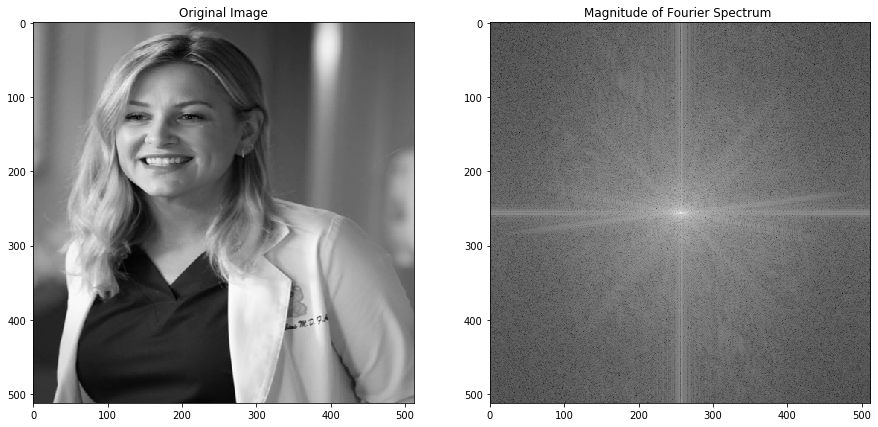

In [10]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(arr,cmap="gray")
axarr[1].imshow(ms,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Magnitude of Fourier Spectrum ")

In [11]:
jo=cv.imread('../images/war_jo.jpg',0)

Text(0.5, 1.0, 'Magnitude of Fourier Spectrum ')

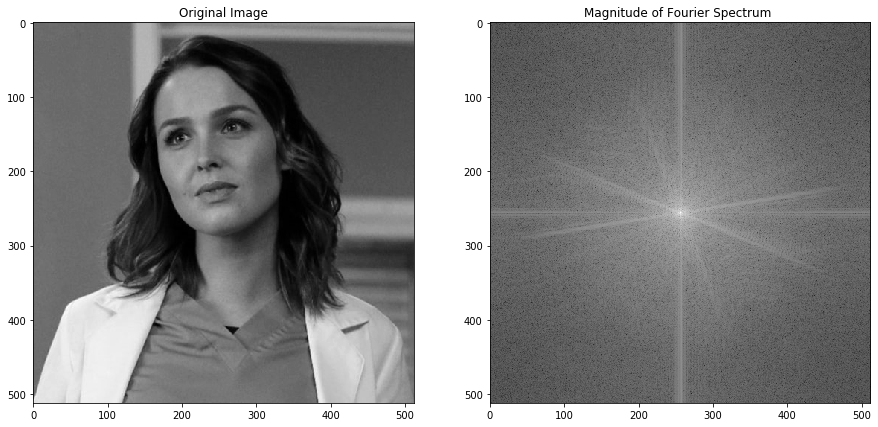

In [12]:
L2   =  np.fft.fftshift(fft2(jo))
ms2  =  20*np.log(np.abs(L2))
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(jo,cmap="gray")
axarr[1].imshow(ms2,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Magnitude of Fourier Spectrum ")

In [13]:
from time import time
dim= [8,16,32,64]
ans = [] 
ans1= []
for i in dim:
    img =  np.random.randint(low=0,high=255,size=(i,i))
    
    start = time()
    temp = DFT_2D(img)
    end = time()
    ans.append(end - start)
    
    start1 = time()
    temp1 = fft2(img)
    end1 = time()
    ans1.append(end1 - start1)

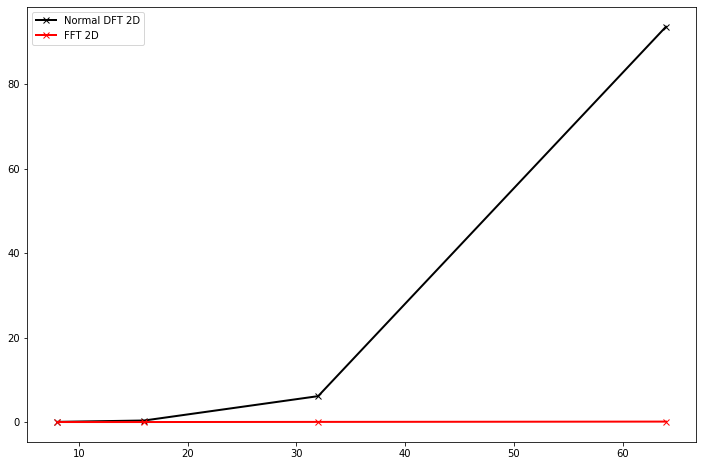

In [14]:
plt.figure(figsize=(12,8))
plt.plot(dim,ans,'kx-',label="Normal DFT 2D",linewidth=2)
plt.plot(dim,ans1,'rx-',label="FFT 2D",linewidth=2)
plt.legend()
plt.show()

## Part 3

In [15]:
def un_ifft(x):
    N = len(x)
    if N <= 1: return x
    even = un_ifft(x[0::2])
    odd =  un_ifft(x[1::2])
    factor= [np.exp(2j*pi*k/N) for k in range(N//2)]
    return  np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])

In [16]:
def ifft(x):
    return (1/x.size) * un_ifft(x)

In [17]:
a=np.arange(8)
np.allclose(ifft(a), np.fft.ifft(a))

True

In [18]:
def ifft2(img):
    M,N=img.shape
    F=np.asarray(img,dtype=complex)
    f=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[:,i]=ifft(F[:,i])
    for j in range(N):
        f[j,:]=ifft(Int[j,:])
    return f

In [19]:
b=np.random.rand(8,8)
np.allclose(ifft2(b), np.fft.ifft2(b))

True

## Part 4

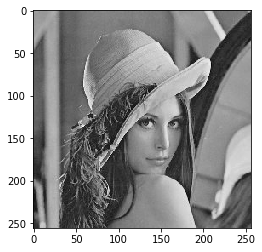

In [20]:
lena=cv.imread('../images/lena256.jpg',0)
plt.imshow(lena,cmap="gray")

In [21]:
r1=fft2(lena)
r2=fft2(r1)

Text(0.5, 1.0, 'Fourier Transform of Fourier Transform of Original')

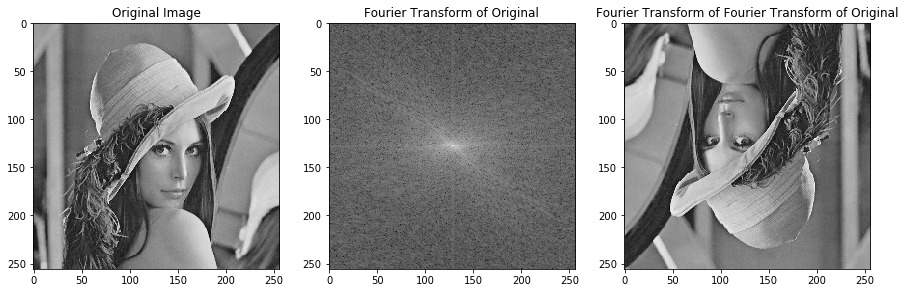

In [22]:
R1   =  np.fft.fftshift(r1)
ms_R1  =  20*np.log(np.abs(R1))
R2   =  r2
ms_R2  =  np.real(R2)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(lena,cmap="gray")
axarr[1].imshow(ms_R1,cmap="gray")
axarr[2].imshow(ms_R2,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Fourier Transform of Original")
axarr[2].set_title("Fourier Transform of Fourier Transform of Original")

<span style="color:red ; font-size:18px">  How is it different from the original image? </span>
### Image after two times Fourier Transform is flipped version of original Image, By the duality principle,</br>
#### FT ( f(t) ) -> F(w)
#### F(t)  -> 2* pi * f(-w)
<br>
<span style="color:green ; font-size:16px"> Hence we get original_image(-w). By flipping this received image we can retrieve original Image. </span>


<span style="color:red ; font-size:18px"> How can you fix this in the frequency domain so that we
would get the original image back instead? </span>

**Let F1  =  FT( Original ) </br>
<br>
<br> Let F2 =  FT( Flipped ( F1 ) ) </br>
<br>
<br> F2 -> Will be same as Original** 
<br>
<br>
<span style="color:green ; font-size:16px"> Input of second Fourier Transform should be flipped version ( i.e F(-t)) of output of first fourier Tranform</span>
#### FT ( f(t) ) -> F(w)
#### F(-t)  -> 2* pi * f(w)

In [30]:
 r3=fft2(np.flip(r1)) #Taking F(-t) or flipped version of F(t)
R3   =  r3
ms_R3  =  np.abs(R3)

Text(0.5, 1.0, 'FT of (Flip of (Fourier Transform of Original))')

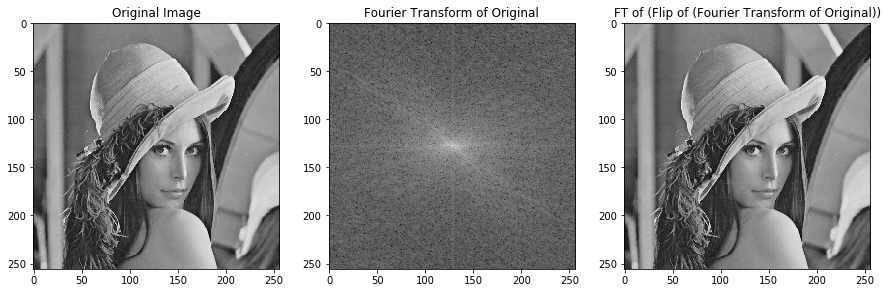

In [29]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(lena,cmap="gray")
axarr[1].imshow(ms_R1,cmap="gray")
axarr[2].imshow(ms_R3,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Fourier Transform of Original")
axarr[2].set_title("FT of (Flip of (Fourier Transform of Original))")